# Tutorial on using the Platform

This is the tutorial bla bla bla

## Initialization

First we need to import the necessary class blabla bla

In [1]:
from qEmQUIP import QEM, conf
import sys, glob, os
from commons import convert_to_json, triq_optimization, qiskit_optimization, \
    calibration_type_enum, qiskit_compilation_enum, normalize_counts, calculate_success_rate_tvd
import wrappers.qiskit_wrapper as qiskit_wrapper
from wrappers.qiskit_wrapper import QiskitCircuit
import pandas as pd

Here we need to initialize the object, please check the `config.ini` file to update the general config

In [2]:
# Put your Qiskit Token
%set_env QXToken=74076e69ed0d571c8e0ff8c0b2c912c28681d47426cf16a5d817825de16f7dbd95bf6ff7c604b706803b78b2e21d1dd5cacf9f1b0aa81d672d938bded8049a17
token = "74076e69ed0d571c8e0ff8c0b2c912c28681d47426cf16a5d817825de16f7dbd95bf6ff7c604b706803b78b2e21d1dd5cacf9f1b0aa81d672d938bded8049a17"
q = QEM(runs=conf.runs, fixed_initial_layout = False, run_in_simulator=conf.run_in_simulator, user_id=conf.user_id, token=token)

env: QXToken=74076e69ed0d571c8e0ff8c0b2c912c28681d47426cf16a5d817825de16f7dbd95bf6ff7c604b706803b78b2e21d1dd5cacf9f1b0aa81d672d938bded8049a17


To update the fake backend calibration data

In [3]:
# q.update_hardware_configs()

In [4]:
# qiskit_wrapper.generate_new_props(q.backend, "avg")
# qiskit_wrapper.generate_new_props(q.backend, "mix")
# qiskit_wrapper.generate_new_props(q.backend, "recent_15_adjust")

## Prepare the circuits

You can get the quantum circuit from a folder contains the qasm files or qasm string

In [5]:
# The path is coming from the config file, but you can also modify it here
conf.base_folder = "./circuits/testing/"
qasm_files = q.get_qasm_files_from_path()
print(qasm_files)

['./circuits/testing/bv_6.qasm']


Get the circuits from file

In [6]:
qc = q.get_circuit_properties(qasm_source=qasm_files[0])
qc.circuit.draw(idle_wires=False)

┌─────────────┐                    ┌─────────────┐               ┌─┐»
q_0: ┤ U3(π/2,0,π) ├─────────────────■──┤ U3(π/2,0,π) ├───────────────┤M├»
     ├─────────────┤                 │  └─────────────┘┌─────────────┐└╥┘»
q_1: ┤ U3(π/2,0,π) ├─────────────────┼─────────■───────┤ U3(π/2,0,π) ├─╫─»
     ├─────────────┤                 │         │       └─────────────┘ ║ »
q_2: ┤ U3(π/2,0,π) ├─────────────────┼─────────┼──────────────■────────╫─»
     ├─────────────┤                 │         │              │        ║ »
q_3: ┤ U3(π/2,0,π) ├─────────────────┼─────────┼──────────────┼────────╫─»
     ├─────────────┤                 │         │              │        ║ »
q_4: ┤ U3(π/2,0,π) ├─────────────────┼─────────┼──────────────┼────────╫─»
     └┬───────────┬┘┌─────────────┐┌─┴─┐     ┌─┴─┐          ┌─┴─┐      ║ »
q_5: ─┤ U3(π,0,π) ├─┤ U3(π/2,0,π) ├┤ X ├─────┤ X ├──────────┤ X ├──────╫─»
      └───────────┘ └─────────────┘└───┘     └───┘          └───┘      ║ »
c: 6/══════════════════════════════════════════════════════════════════╩═»
                                                                       0 »
«                                                                 
«q_0: ────────────────────────────────────────────────────────────
«                    ┌─┐                                          
«q_1: ───────────────┤M├──────────────────────────────────────────
«     ┌─────────────┐└╥┘               ┌─┐                        
«q_2: ┤ U3(π/2,0,π) ├─╫────────────────┤M├────────────────────────
«     └─────────────┘ ║ ┌─────────────┐└╥┘               ┌─┐      
«q_3: ───────■────────╫─┤ U3(π/2,0,π) ├─╫────────────────┤M├──────
«            │        ║ └─────────────┘ ║ ┌─────────────┐└╥┘┌─┐   
«q_4: ───────┼────────╫────────■────────╫─┤ U3(π/2,0,π) ├─╫─┤M├───
«          ┌─┴─┐      ║      ┌─┴─┐      ║ ├─────────────┤ ║ └╥┘┌─┐
«q_5: ─────┤ X ├──────╫──────┤ X ├──────╫─┤ U3(π/2,0,π) ├─╫──╫─┤M├
«          └───┘      ║      └───┘      ║ └─────────────┘ ║  ║ └╥┘
«c: 6/════════════════╩═════════════════╩═════════════════╩══╩══╩═
«                     1                 2                 3  4  5

Or you can also get it from the qasm strings

In [7]:
qasm_text = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""

qc = q.get_circuit_properties(qasm_source=qasm_text)
qc.circuit.draw(idle_wires=False)

┌─────────────┐      ░ ┌─┐   
q_0: ┤ U3(π/2,0,π) ├──■───░─┤M├───
     └─────────────┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ───────────────┤ X ├─░──╫─┤M├
                    └───┘ ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

`q.get_circuit_properties` will give an object of `QiskitCircuit` which will give the information of the circuits: 
- `circuit`: `QuantumCircuit` object from Qiskit
- `depth`: circuit depth
- `gates`: number of gates used in the circuit
- `total_gates`: number of total gates used in the circuit
- `correct_output`: noiseless output from the simulation
- `qasm`: OpenQASM2 file from the circuit translated to `U3` and `cx` gates
- `qasm_original`: OpenQASM2 file from the circuit original


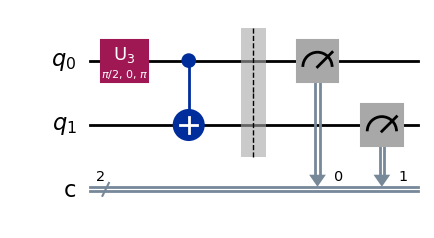

In [8]:
qc.circuit.draw("mpl")

In [9]:
print("Number of depth:", qc.depth)
print("Number of gates:", qc.gates)
print("Number of total gates:", qc.total_gate) 
print("Noiseless simulation output:", qc.correct_output)
print("Circuit Qasm:", qc.qasm)

Number of depth: 3
Number of gates: {'measure': 2, 'u3': 1, 'cx': 1, 'barrier': 1}
Number of total gates: 3
Noiseless simulation output: {'3': 0.4991, '0': 0.5009}
Circuit Qasm: OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
u3(pi/2,0,pi) q[0];
cx q[0],q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];


## Compilation Techniques

### Qiskit

We integrated several compilation techniques from Qiskit

In [10]:
print("Existing Qiskit Compilation Options:")
for member in qiskit_compilation_enum:
    print(member.name)

Existing Qiskit Compilation Options:
qiskit_0
qiskit_3
qiskit_NA_avg
qiskit_NA_lcd
qiskit_NA_mix
qiskit_NA_w15
qiskit_NA_avg_adj
qiskit_NA_lcd_adj
qiskit_NA_mix_adj
qiskit_NA_w15_adj
qiskit_NA_wn
qiskit_NA_wn_adj
mapomatic_lcd
mapomatic_avg
mapomatic_mix
mapomatic_avg_adj
mapomatic_w15_adj


In [11]:
updated_qasm = q.compile(qasm=qc.qasm_original, compilation_name=qiskit_compilation_enum.qiskit_3.value)
print(updated_qasm)

OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(param0) q1; cx q0,q1; h q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
qreg q[127];
creg c[2];
rz(-pi) q[122];
sx q[122];
rz(-pi) q[122];
rz(pi/2) q[123];
sx q[123];
ecr q[123],q[122];
x q[123];
barrier q[123],q[122];
measure q[123] -> c[0];
measure q[122] -> c[1];


### TriQ

Also, we integrate TriQ Compilation with different options.

Qubit placement options:
- `na`: initial mapping from Noise-adaptive technique []
- `mapo`: initial mapping from Mapomatic technique []
- `sabre`: initial mapping from SABRE []

Calibration type options:
- `lcd` : TriQ's routing with last calibration data.
- `avg` : TriQ's routing with average calibration data.
- `mix` : TriQ's routing with mix calibration data. (Mix = if the qubits calibrated today, we will use the last calibration data for that qubit, otherwise we will use the average)
- `w15` : TriQ's routing with average calibration data of 15 days from the qubit is compiled.

The combinations of name become: `triq_<calibration_type>_<layout>`. For examples:
- `triq_avg_na`
- `triq_mix_sabre`

**Note: From Qiskit version > 1.0.0, `noise_adaptive` layout has been removed**

In [12]:
updated_qasm = q.compile(qasm=qc.qasm_original, compilation_name="triq_avg_sabre")
print(updated_qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[127];
creg c[127];
u2(0,3.14159265358979) q[39];
cx q[39],q[40];
measure q[39] -> c[0];
measure q[40] -> c[1];



## Initiate Noisy simulator

To play around with the noise, we can get retrieve the last recorded calibration data from IBM's backend, and scale down the error


In [13]:
noise_model, noisy_simulator, coupling_map = qiskit_wrapper.get_noisy_simulator(q.backend, 1)

## Running the compiled circuit to the simulator

First, we need to transpile the circuit to the targeted backend

In [14]:
qc = QiskitCircuit(updated_qasm)
circuit = qc.transpile_to_target_backend(q.backend, False)
# circuit.draw("mpl", idle_wires=False, fold=60)

In [15]:
job = noisy_simulator.run(circuit, shots=10000)
result = job.result()  
output = result.get_counts()
output_normalize = normalize_counts(output, shots=10000)
# output_normalize

## Calculate the Fidelity

In [16]:
calculate_success_rate_tvd(qc.correct_output,output_normalize)

0.9878

# Put all of them together

In [17]:
res_circuit_name = []
res_compilations = []
res_noise_levels = []
res_success_rate = []

# prepare the circuit
conf.base_folder = "./circuits/testing/"
qasm_files = q.get_qasm_files_from_path()

shots = 10000

# select compilation techniques
compilations = ["qiskit_0", "qiskit_3", "triq_lcd_sabre"]
# compilations = ["qiskit_3", "triq_lcd_na"]

# select the noise levels (0 = noiseless, 1 = noise model from real backend)
noise_levels = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

for qasm in qasm_files:
    for comp in compilations:
        for noise in noise_levels:
            qc = q.get_circuit_properties(qasm_source=qasm)
            circuit_name = qasm.split("/")[-1].split(".")[0]
    
            updated_qasm = q.compile(qasm=qc.qasm_original, compilation_name=comp)
            compiled_qc = QiskitCircuit(updated_qasm)
            circuit = compiled_qc.transpile_to_target_backend(q.backend, False)
            
            noise_model, noisy_simulator, coupling_map = qiskit_wrapper.get_noisy_simulator(q.backend, noise)

            job = noisy_simulator.run(circuit, shots=shots)
            result = job.result()  
            output = result.get_counts()
            output_normalize = normalize_counts(output, shots=shots)

            tvd = calculate_success_rate_tvd(qc.correct_output,output_normalize)
            print(circuit_name, "- compilation :", comp, ", noise level :", noise, ", success rate :", tvd)
            res_circuit_name.append(circuit_name)
            res_compilations.append(comp)
            res_noise_levels.append(noise)
            res_success_rate.append(tvd)

        


bv_6 - compilation : qiskit_0 , noise level : 0.0 , success rate : 1.0
bv_6 - compilation : qiskit_0 , noise level : 0.1 , success rate : 0.9526
bv_6 - compilation : qiskit_0 , noise level : 0.2 , success rate : 0.9172
bv_6 - compilation : qiskit_0 , noise level : 0.4 , success rate : 0.8233999999999999
bv_6 - compilation : qiskit_0 , noise level : 0.6 , success rate : 0.748
bv_6 - compilation : qiskit_0 , noise level : 0.8 , success rate : 0.7101000000000002
bv_6 - compilation : qiskit_0 , noise level : 1.0 , success rate : 0.6503000000000001
bv_6 - compilation : qiskit_3 , noise level : 0.0 , success rate : 1.0
bv_6 - compilation : qiskit_3 , noise level : 0.1 , success rate : 0.5676000000000001
bv_6 - compilation : qiskit_3 , noise level : 0.2 , success rate : 0.9526
bv_6 - compilation : qiskit_3 , noise level : 0.4 , success rate : 0.9319
bv_6 - compilation : qiskit_3 , noise level : 0.6 , success rate : 0.3109000000000002
bv_6 - compilation : qiskit_3 , noise level : 0.8 , success

## Plot the results

In [18]:
df = pd.DataFrame({
        'circuit_name': res_circuit_name,
        'compilation': res_compilations,
        'noise_level': res_noise_levels,
        'success_rate': res_success_rate
    })

In [19]:
def create_line_chart(data, y, opt_values, metric, ax, type, ylabel, xlabel, yticks = None, 
                      y_bot = None, y_top = None, figsize = (12,8), c_idx = 0, reindex = None, x_index = "header_id", x_labels = []):
    tmp = ()
    
    for idx, opt in enumerate(opt_values):
        # print(idx, opt)
        idx = idx + c_idx
        pivot = pd.pivot_table(data[data[y] == opt], 
                               values=[metric], 
                               index=x_index, 
                               columns=y, 
                               aggfunc='mean')    

        if reindex != 0:
            if reindex is None:
                if len(tmp) == 0:
                    tmp = pivot.index
                else:
                    pivot = pivot.reindex(tmp)
            else:
                pivot = pivot.reindex(reindex)
     
        idx_color = idx % (len(markers))       
      
        pivot.plot(kind='line', color=CB_color_cycle[idx], marker=markers[idx_color], figsize=figsize, ax=ax)

        mean= pivot.mean().mean()
   
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    

    if yticks is not None:
        ax.set_yticks(yticks)

    if y_bot is not None and y_top is not None:
        ax.set_ylim(bottom= y_bot, top= y_top)

    if x_labels is not None:
        ax.set_xticks(np.arange(len(x_labels)))
        ax.set_xticklabels(x_labels)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    ax.grid()


In [20]:
def show_figure_by_opt(df, y, y_values, metric, ylabel, xlabel, legend = None, figsize=(10,6), reindex=None, 
                             x_index = "total_2q", x_labels = [], x_lim = [1, 100], 
                            y_lim = [0,1], title=None, legend_position=None, circuit_name = "", hw_name = ""):
    metrics = [metric]
    row = 1
    col = 1

    fig, ax = plt.subplots(nrows=row, ncols=1)

    yticks = None
    
    for i in range(row):
        create_line_chart(df, y, y_values, metrics[i], ax, "opt", ylabel, xlabel, yticks, figsize=figsize, reindex=reindex,
                          x_index = x_index, x_labels=x_labels)

    if legend is None:
        l2 = plt.legend()
    else:
        if legend_position == None:
            l2 = plt.legend(legends)
        else:
            l2 = plt.legend(legends, loc = legend_position)
    
    plt.xlim(x_lim) 
    plt.ylim(y_lim)
    plt.title(title)
    # plt.savefig("./output/{}_{}_{}.png".format(circuit_name, hw_name, x_index), dpi=500)
    plt.show()

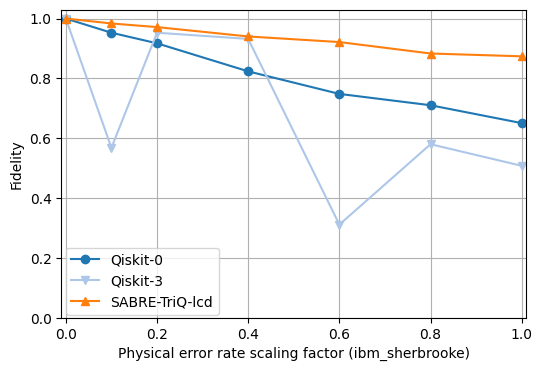

In [21]:
import matplotlib.pyplot as plt

CB_color_cycle = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#D62728', '#FF9896',
                  '#9467BD', '#C5B0D5', '#8C564B', '#C49C94', '#E377C2', '#F7B6D2', '#7F7F7F', '#C7C7C7',
                  '#BCBD22', '#DBDB8D', '#17BECF', '#9EDAE5'
                  ]

markers = ['o', 'v', '^', 's', '+', '*', 'x', 'd', '<', '>', 'p']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']


y_values = ["qiskit_0", "qiskit_3", "triq_lcd_sabre"]
legends  = ["Qiskit-0", "Qiskit-3", "SABRE-TriQ-lcd"]

x_labels = None


show_figure_by_opt(df, "compilation", y_values, "success_rate", "Fidelity", "Physical error rate scaling factor (ibm_sherbrooke)", legends, figsize=(6,4), 
                   reindex=None, x_index = "noise_level", x_labels=x_labels, x_lim=[-0.01, 1.01], y_lim=[0,1.03],
                        legend_position=(0.01,0.01), circuit_name = "bv_6", hw_name = "sherbrooke")